<a href="https://colab.research.google.com/github/asyaf/fun_mini_projects/blob/master/visited%20countries%20visualization/where_was_i.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating my personal visited countries video

## Imports

In [0]:
!apt-get -qq install python-cartopy python3-cartopy
import cartopy.crs as ccrs
import cv2
import cartopy.io.shapereader as shpreader
import itertools
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

## Consts

In [0]:
COUNTRY_COLOR = np.array([(35, 139, 69)]) / 255.
DEFAULT_COLOR = np.zeros(3)

VISITED_COUNTRIES_BY_YEAR = {2019: ["Argentina", "Brazil", "Chile", "Bolivia", "Peru", "Ecuador", "Colombia"], 
                             2018: ["United Republic of Tanzania", "Czechia", "Bosnia and Herzogovina"],
                             2017: ["France", "Switzerland", "Germany", "Austria"],
                             2016: ["Jordan", "United States of America", "Germany", "Vietnam"],
                             2015: ["United States of America", "Kyrgistan"],
                             2014: ["Albania", "Montenegro"],
                             2013: ["Georgia"],
                             2012: ["Nepal"],
                             2010: ["South Korea", "New Zealand"],
                             2008: ["Spain"],
                             2004: ["Poland"],
                             2003: ["Russia"],
                             2002: ["Netherlands"],
                             2000: ["Italy"],
                             1990: ["Israel"],
                             1987: ["Russia"]}

## Read countries data
(from [NaturalEarthData](https://www.naturalearthdata.com/) website)

In [0]:
shapename = 'admin_0_countries'
countries_shp = shpreader.natural_earth(resolution='110m',
                                        category='cultural', name=shapename)

In [0]:
def process_all_countries(ax):
  """
  Draw all countries in default color and create a map of coutry names
  """
  country_name_to_record = {}
  for country in shpreader.Reader(countries_shp).records():
    country_name = country.attributes['ADMIN']
    country_name_to_record[country_name] = country
    ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                       facecolor=DEFAULT_COLOR,
                       label=country_name)
  return country_name_to_record

In [0]:
def color_visited(country_name_to_record, ax):
  """
  Generate figure for every year with the vountries visited so far
  """
  img_files = []
  sorted_years = sorted(VISITED_COUNTRIES_BY_YEAR.keys())
  visited_set = set()
  for year in range(sorted_years[0], sorted_years[-1]+1):
    if year in VISITED_COUNTRIES_BY_YEAR:
      visited = VISITED_COUNTRIES_BY_YEAR[year]
    else:
      visited = None
    if visited is not None:
      for country_name, country in country_name_to_record.items():
        # check if country name is contained. Note that official names can 
        # differ from the "common" country name 
        if country_name in visited:
          ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                       facecolor=COUNTRY_COLOR,
                       label=country_name)
          visited_set.add(country_name)

    # add text
    year_itm = ax.text(0.15, 0.2, year, fontsize=15, color = "red", 
        ha='center', va='center', transform=ax.transAxes)
    count_itm = ax.text(0.9, 0.2, len(visited_set), fontsize=15, color = "red", 
        ha='center', va='center', transform=ax.transAxes)
    
    img_file = "{}.png".format(year)
    plt.savefig(img_file, bbox_inches='tight', pad_inches=0)
    img_files.append(img_file)

    # prevent writing text over the next instances
    year_itm.set_visible(False)
    count_itm.set_visible(False)

  return img_files

In [0]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())

country_name_to_record = process_all_countries(ax)
img_files = color_visited(country_name_to_record, ax)

plt.close()

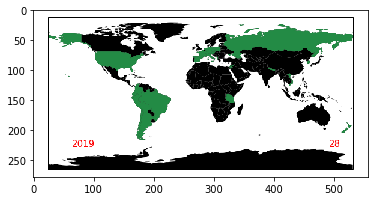

In [12]:
# see last image
img = mpimg.imread(img_files[-1])
plt.imshow(img)

## Generate video

In [0]:
img_array = []
for filename in img_files:
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)

out_video = "where_was_i.mp4" 
fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
out = cv2.VideoWriter(out_video,fourcc,1,(width,height)) 
for i in range(len(img_array)):
    out.write(img_array[i])

# write last image 3 times to let it linger
out.write(img_array[i])
out.write(img_array[i])

out.release()

In [0]:
from google.colab import files
files.download(out_video) 